# Prelude

In [2]:
import matplotlib.pyplot as plt
import json
import numpy as np
import ast

In [ ]:
# load in player 1 policy
p1 = open('../policies/3/logs_582023_19237/readable_policy_p1.txt')
p1 = json.load(p1)

In [ ]:
base = "[0. 0. 0. 0. 0. 0. 0. 0. 0.]"
all = []
for i in range(1, len(base), 3):
  tmp = base
  tmp = tmp[:i] + '1' + tmp[i+1:]
  all.append(tmp)
   
stateOne = {}
for key in p1:
  if key in all: stateOne[key] = p1[key]

In [ ]:
print(f"#  {stateOne['[1. 0. 0. 0. 0. 0. 0. 0. 0.]']:.2f}|{stateOne['[0. 1. 0. 0. 0. 0. 0. 0. 0.]']:.2f}|{stateOne['[0. 0. 1. 0. 0. 0. 0. 0. 0.]']:.2f}")
print(f"#  ----+----+----")
print(f"#  {stateOne['[0. 0. 0. 1. 0. 0. 0. 0. 0.]']:.2f}|{stateOne['[0. 0. 0. 0. 1. 0. 0. 0. 0.]']:.2f}|{stateOne['[0. 0. 0. 0. 0. 1. 0. 0. 0.]']:.2f}")
print(f"#  ----+----+----")
print(f"#  {stateOne['[0. 0. 0. 0. 0. 0. 1. 0. 0.]']:.2f}|{stateOne['[0. 0. 0. 0. 0. 0. 0. 1. 0.]']:.2f}|{stateOne['[0. 0. 0. 0. 0. 0. 0. 0. 1.]']:.2f}")


ok I want to make a display starting from player 1 to the end of the game where best move is green and worst move is red and everyting else is gradually in between

In [ ]:
# Extract values from the dictionary and reshape into a 3x3 grid
values = np.array(list(stateOne.values())).reshape(3, 3)
print(values)

# Create the heatmap with color spectrum
plt.imshow(values, cmap='RdYlGn', vmin=np.min(values), vmax=np.max(values))

# optionally show colorbar to indicate the value range
plt.colorbar()

# Add the percentages inside each cell
for i in range(3):
    for j in range(3):
        plt.text(j, i, f"{values[i, j]:.2f}", ha='center', va='center', color='black', fontsize=15)

# Set the axis labels
plt.xticks(range(3), ['0', '1', '2'])
plt.yticks(range(3), ['0', '1', '2'])

# Show the plot
plt.show()

# The Real Beef

In [4]:
# loading p1/p2 policies to simulate a game between 2 bots
# p1 p2 p1 p2 p1 p2 p1 p2 p1

### some cleaning to the files had to be done to run the analysis
# - replace all double quote followed by space with double quote
# - replace all two spaces with one space
# - replace all square bracket followed by space with square bracket

p1 = json.load(open('../policies/logs_582023_19237/readable_policy_p1.txt'))
p2 = json.load(open('../policies/logs_582023_19237/readable_policy_p2.txt'))

In [5]:
# we want generate all possibile positions from base, then select max, then repeat
# this way we get the 'ideal' game effectively
board = np.array([0., 0., 0., 0., 0., 0., 0., 0., 0.])

states = {}

counter = 0
while(counter <= len(board)):
  policy, mark = p2, -1
  if counter % 2 == 0: policy, mark = p1, 1
  
  tmp_dict = {}
  for i in range(0, len(board), 1):
    tmp = np.copy(board)
    if tmp[i] == 0:
      tmp[i] = mark
      # do not ask about why I need the replace :)
      # you may choose to remove them to experience the wrath of numpy and json
      tmp_dict[f"{tmp}"] = policy[f"{tmp}".replace("  ", " ").replace("[ ", "[")]
    else:
      tmp_dict[f"{i}"] = -10

  board = max(tmp_dict, key=tmp_dict.get).replace("[", "").replace("]", "").replace(".", "")
  board = np.fromstring(board, dtype=float, sep=' ')
  states[f"{counter}"] = tmp_dict
  
  counter += 1

# Serializing json  
jsonObj = json.dumps(states, indent=4)
with open("states.json", "wt") as outfile:
    outfile.write(jsonObj)

In [6]:
def heatMap(stateOne, board, mark):
  # Extract values from the dictionary and reshape into a 3x3 grid
  npArray = np.array(list(stateOne.values()))
  values = np.array(npArray.reshape(3, 3))
  new_values = np.delete(npArray, np.where(npArray == -10))
  
  if np.prod(new_values.shape) != 0:
    # Create the heatmap with color spectrum
    plt.imshow(values, cmap='RdYlGn', vmin=np.min(new_values), vmax=np.max(new_values))
  else:
    plt.imshow(values, cmap='RdYlGn', vmin=np.min(0), vmax=np.max(1))
    
  # optionally show colorbar to indicate the value range
  plt.colorbar()

  # Add the percentages inside each cell
  
  for i in range(3):
    for j in range(3):
      if values[i, j] == -10 and board[i, j] == 0:
        plt.text(j, i, f"{mark}", ha='center', va='center', color='black', fontsize=40)
        if mark == 'x': board[i, j] = 1
        if mark == 'o': board[i, j] = -1
      elif values[i, j] == -10 and board[i, j] == 1:
        plt.text(j, i, f"x", ha='center', va='center', color='black', fontsize=40)
      elif values[i, j] == -10 and board[i, j] == -1:
        plt.text(j, i, f"o", ha='center', va='center', color='black', fontsize=40)
      else:
        plt.text(j, i, f"{values[i, j]:.2f}", ha='center', va='center', color='black', fontsize=15)
          

  # Set the axis labels
  plt.xticks(range(3), ['0', '1', '2'])
  plt.yticks(range(3), ['0', '1', '2'])

  # Show the plot
  plt.show()
  return None

In [7]:
f = open("./states.json")
jsonObj = json.load(f)
f.close()

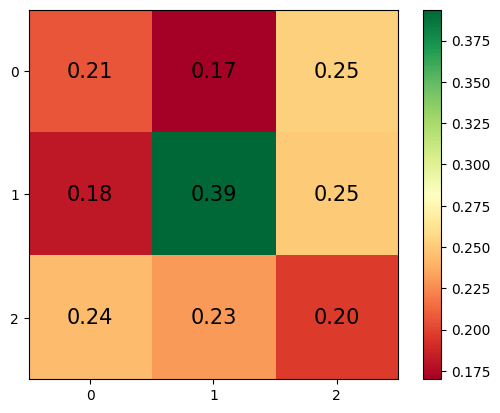

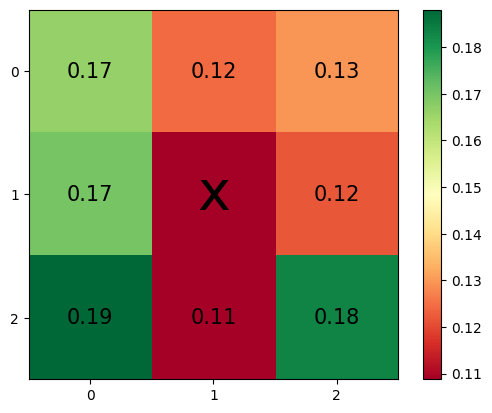

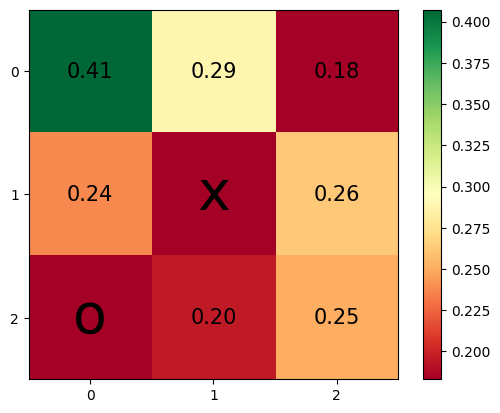

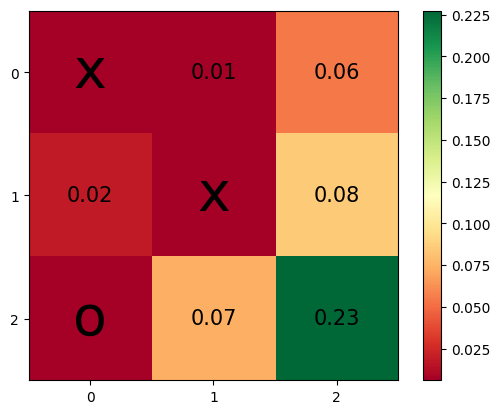

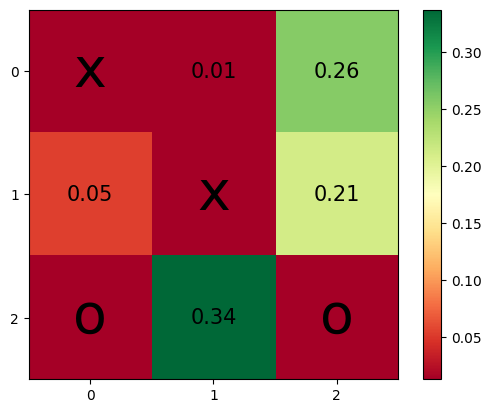

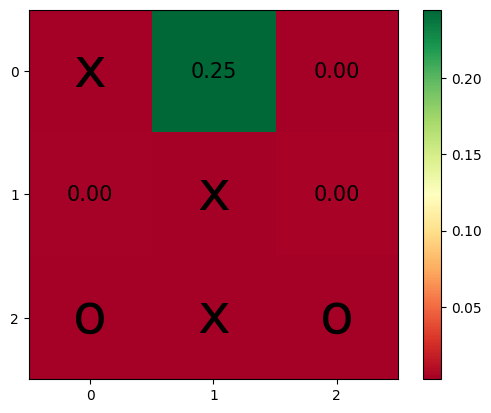

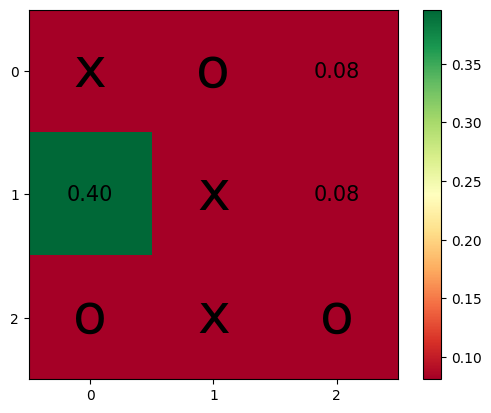

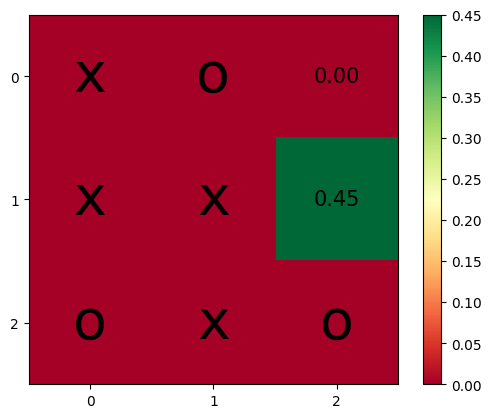

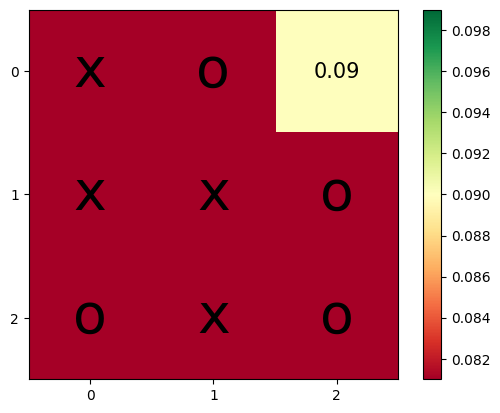

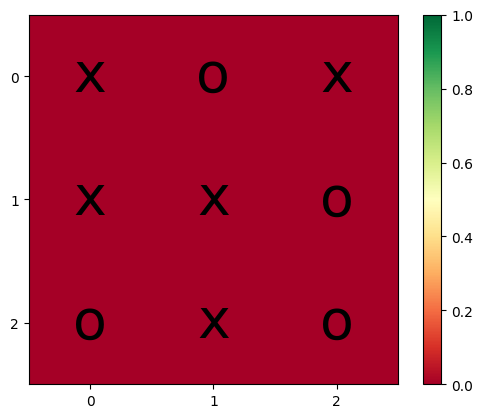

In [8]:
b = np.array([0., 0., 0., 0., 0., 0., 0., 0., 0.]).reshape(3,3)
for i in range(0, 10, 1):
  # reversed logic, since the first block starts with nothing
  mark = 'x'
  if i % 2 == 0: mark = 'o'
  heatMap(jsonObj[f"{i}"], b, mark)


In [4]:
file = open("../policies/3/logs_582023_19237/board.txt")
games = {}

content = file.readlines()
for i in range(0, len(content), 8):
  key = str(content[i:i+8])
  if key in games: games[key] += 1
  else: games[key] = 1
  
# verify that there are 50,000 games, or however many you expect
total_games = 0
unique_games = 0
for _, value in games.items():
  unique_games += 1
  total_games += value
print("total games:", total_games)
print("unique games:", unique_games)

# Serializing json  
jsonObj = json.dumps(games, indent=4)
with open("games.json", "wt") as outfile:
    outfile.write(jsonObj)

total games: 50000
unique games: 894


In [46]:

# Get the top x key-value pairs with largest values
TOP = 3
top_most_played_positions = sorted(games.items(), key=lambda item: item[1], reverse=True)[:TOP]

# Print the top x key-value pairs
for key, value in top_most_played_positions:
  key = ast.literal_eval(key)
  print(f"This position was played {value} times!")
  for line in key:
    print(line, end="")

This position was played 1549 times!
#  p1: x  p2: o
#   
#   x|o|x
#   -+-+-
#   o|x|x
#   -+-+-
#   o|x|o
#
This position was played 1490 times!
#  p1: x  p2: o
#   
#   x|x|o
#   -+-+-
#   o|x|x
#   -+-+-
#   x|o|o
#
This position was played 1483 times!
#  p1: x  p2: o
#   
#   x|o|x
#   -+-+-
#   x|x|o
#   -+-+-
#   o|x|o
#
